In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("train.csv")

In [3]:
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.shape

(29020, 20)

In [5]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [6]:
df["no_of_adults"].value_counts()

no_of_adults
2    20896
1     6154
3     1841
0      116
4       13
Name: count, dtype: int64

In [8]:
df.drop(columns=["Unnamed: 0","Booking_ID"], inplace=True)

In [9]:
df.shape

(29020, 18)

In [10]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(21359, 18)

In [15]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

#### Our data in Imbalanced

In [18]:
cat_cols= ['type_of_meal_plan','required_car_parking_space', 'room_type_reserved','market_segment_type','repeated_guest',
           'booking_status']
num_cols= [
    'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 
         'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 
        'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'
]

## EDA

In [21]:
data= df.copy()

In [22]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


#### Univariate analysis

In [26]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features),2, figsize=(15, len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")
        
        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()


C:\Users\sneha\AppData\Local\Temp\ipykernel_6316\1587583492.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
C:\Users\sneha\AppData\Local\Temp\ipykernel_6316\1587583492.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
C:\Users\sneha\AppData\Local\Temp\ipykernel_6316\1587583492.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
C:\Users\sneha\AppData\Local\Temp\ipykernel_6316\1587583492.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect

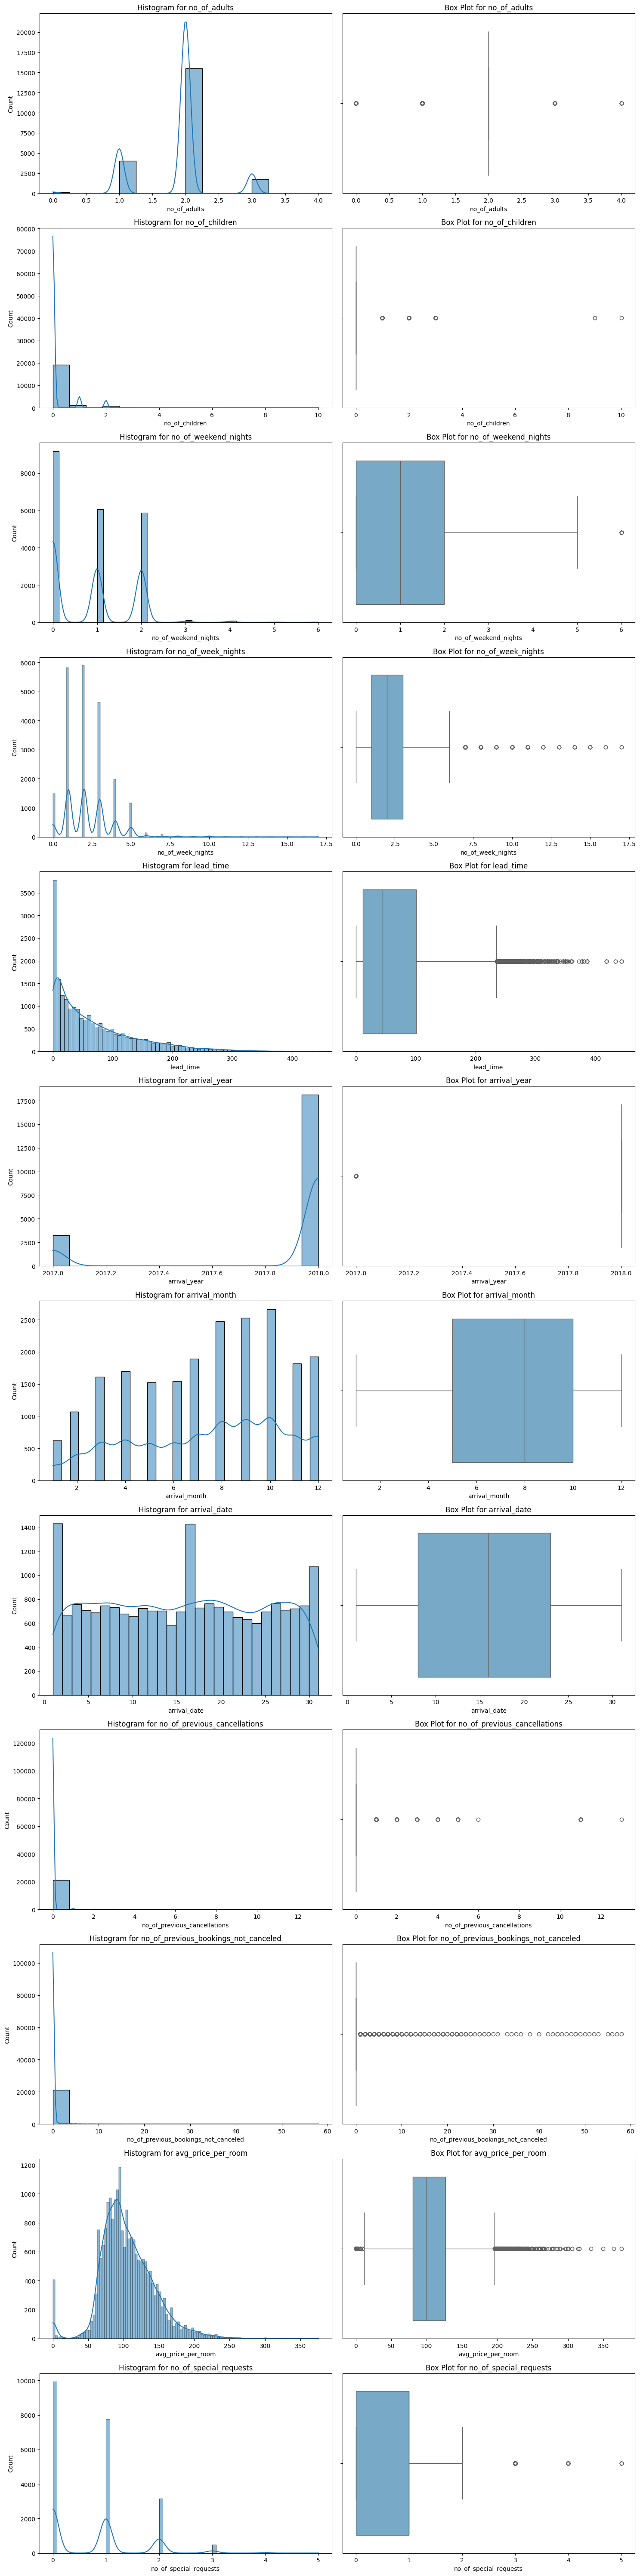

In [27]:
num_plot_dist(data, num_cols)

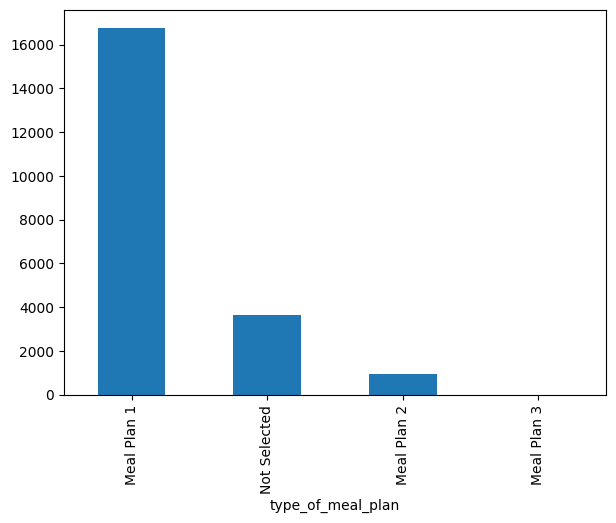

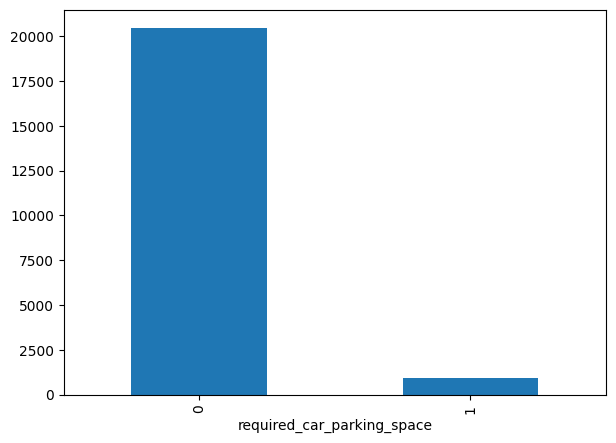

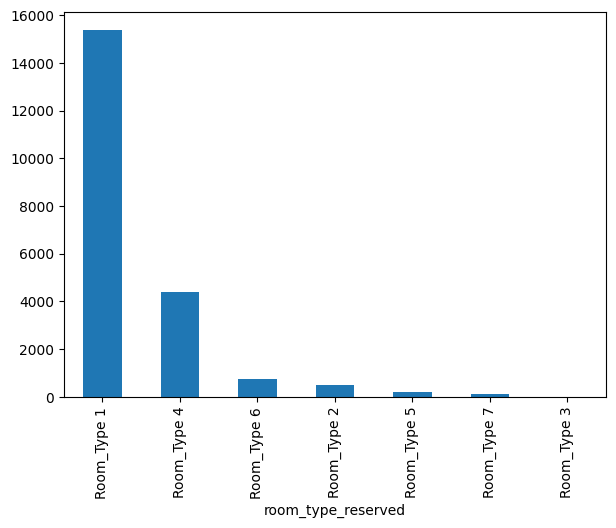

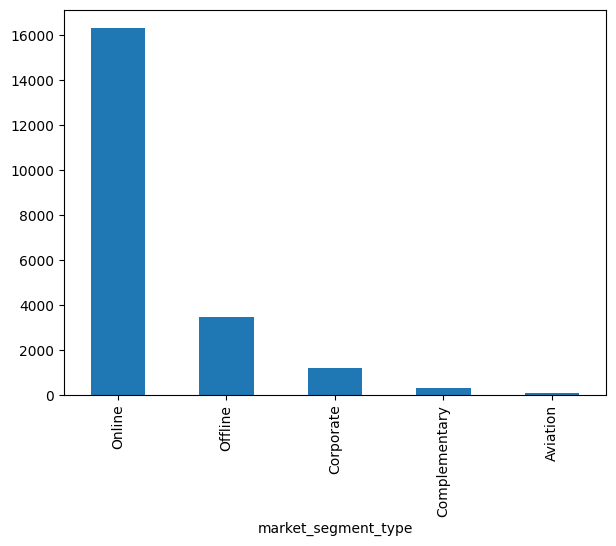

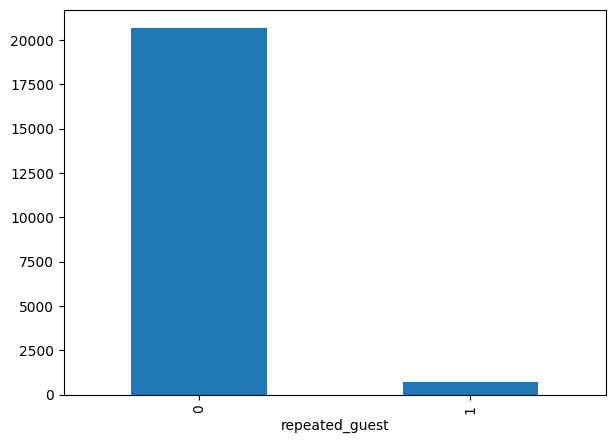

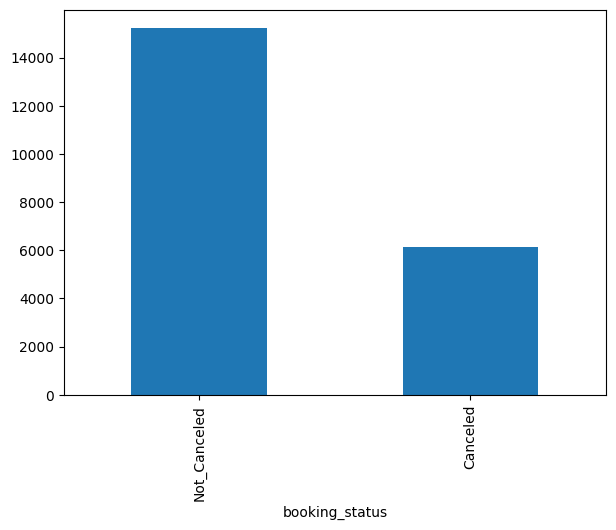

In [29]:
for cat_features in cat_cols:
    plt.figure(figsize=(7,5))
    data[cat_features].value_counts().plot(kind='bar')

#### Bivariate analysis

In [33]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows= (num_plots+1)//2
    
    fig, axes= plt.subplots(num_rows,2, figsize=(14,num_rows*5))
    axes=axes.flatten()
    
    for i , column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f"{column} vs {target}")
    
    plt.tight_layout()
    plt.show()
    

C:\Users\sneha\AppData\Local\Temp\ipykernel_6316\1608898665.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
C:\Users\sneha\AppData\Local\Temp\ipykernel_6316\1608898665.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
C:\Users\sneha\AppData\Local\Temp\ipykernel_6316\1608898665.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
C:\Users\sneha\AppData\Local\Temp\ipy

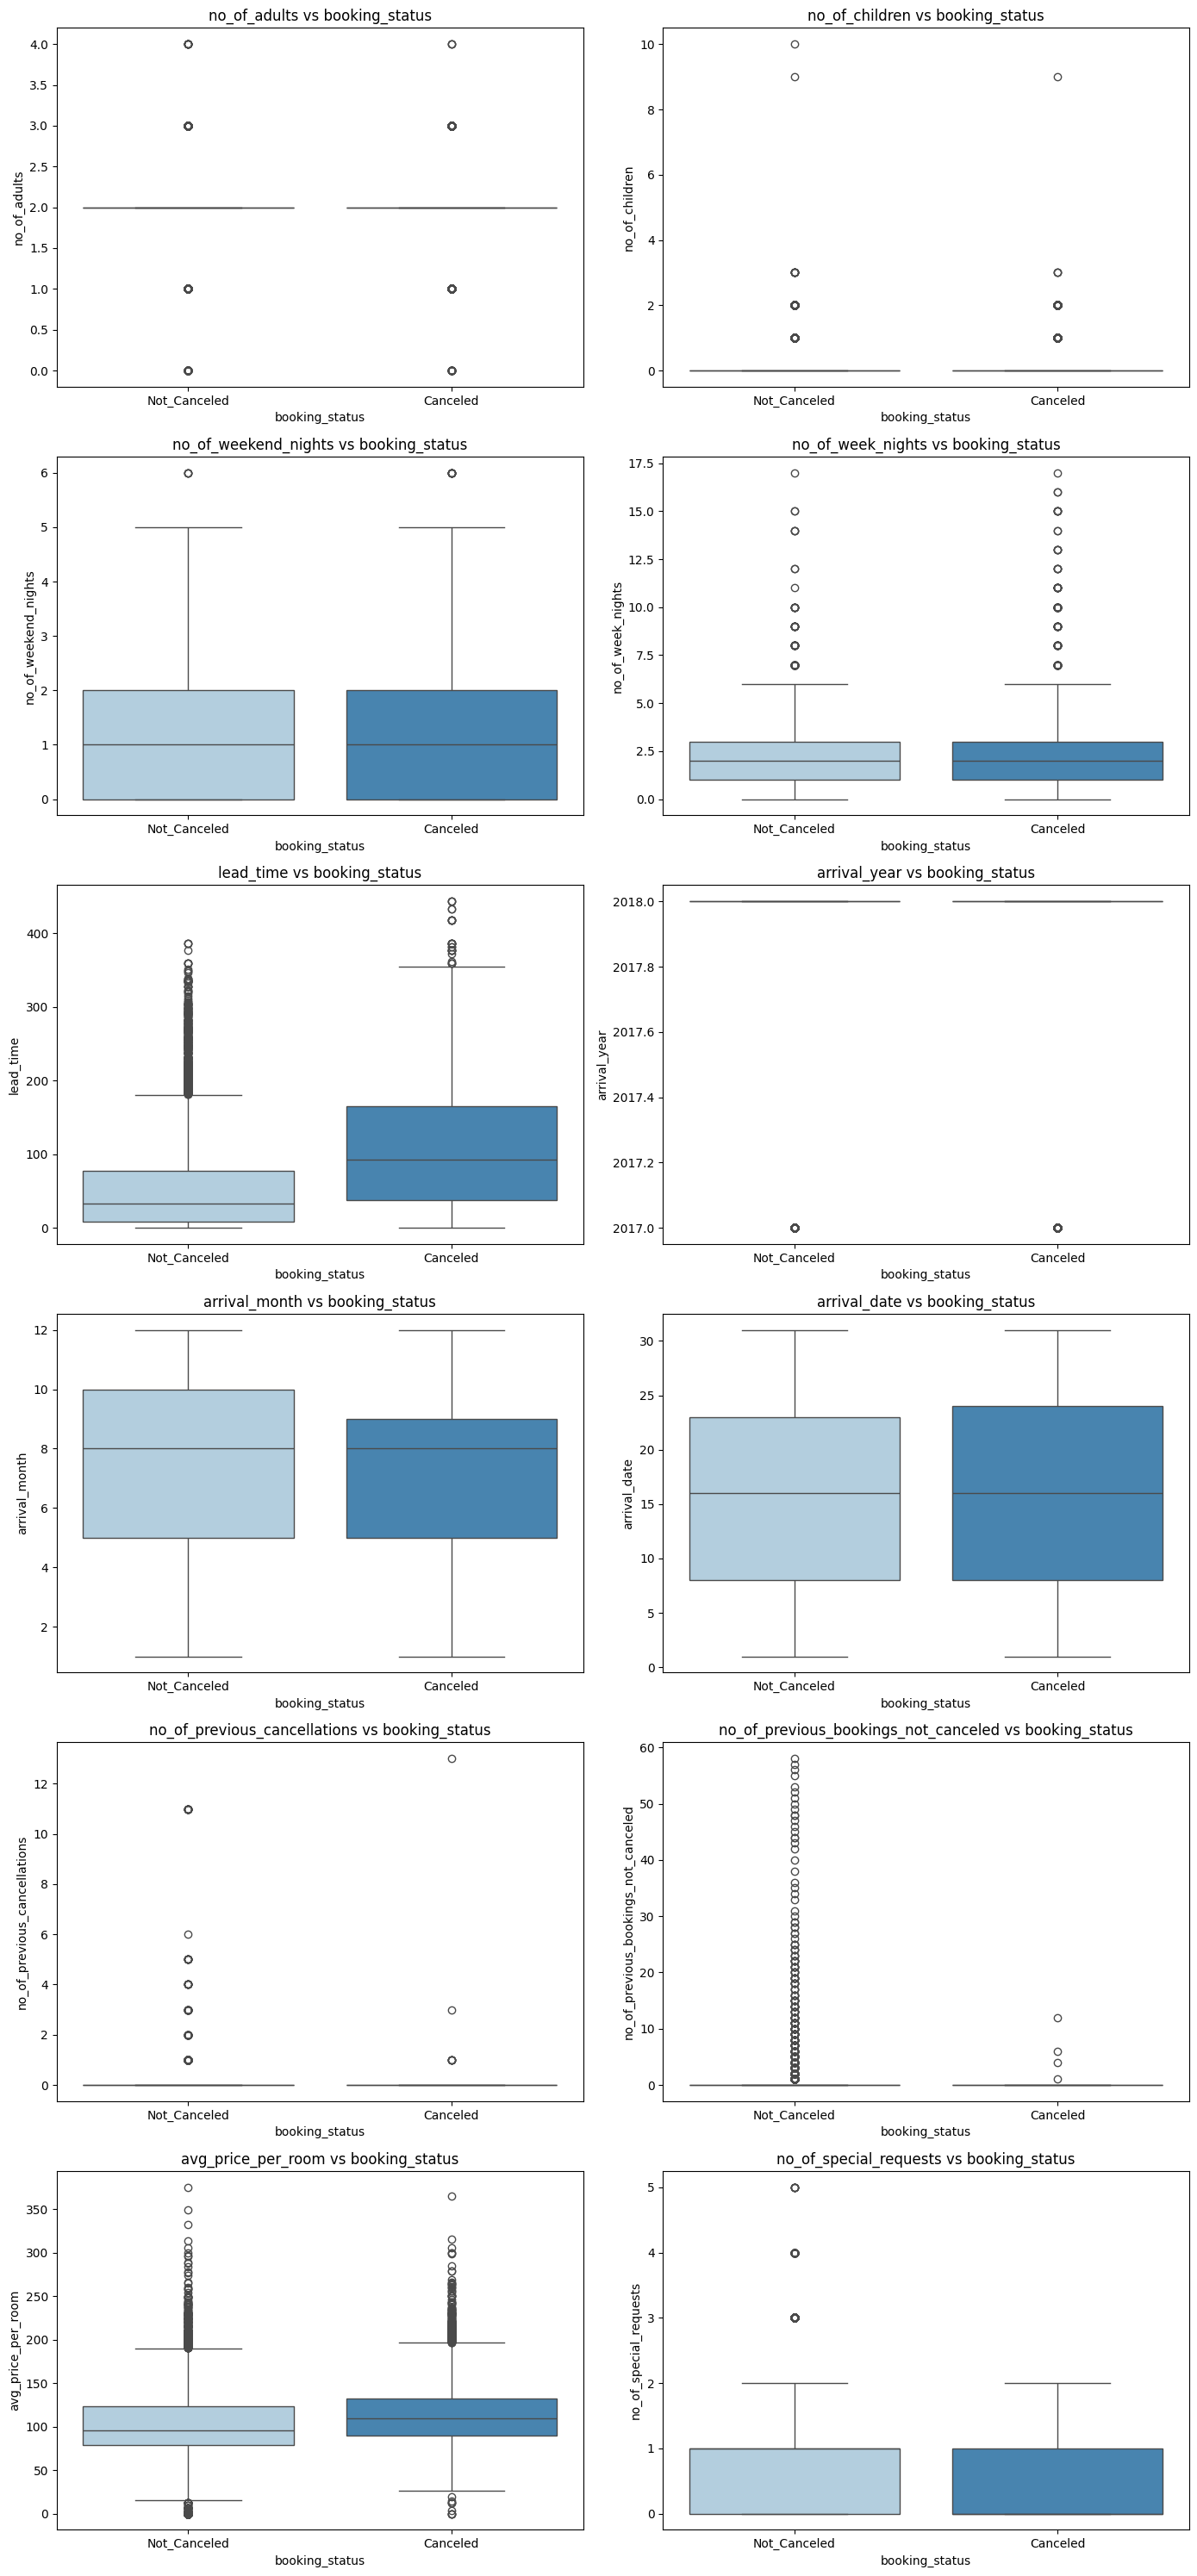

In [34]:
plot_bivariate_num(data, "booking_status", num_cols)

In [38]:
def plot_bivariate_cat(df, target, cat_features):
    num_features=len(cat_features)
    num_rows=(num_features+1)//2
    
    fig, axes= plt.subplots(num_rows,2, figsize=(14,num_rows*5))
    axes=axes.flatten()
    
    for i , feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, ax=axes[i], data=df, palette="Set2")
        axes[i].set_title(f"{feature} vs {target}")
        axes[i].tick_params(axis= 'x', rotation=90)
    
    plt.tight_layout()
    plt.show()

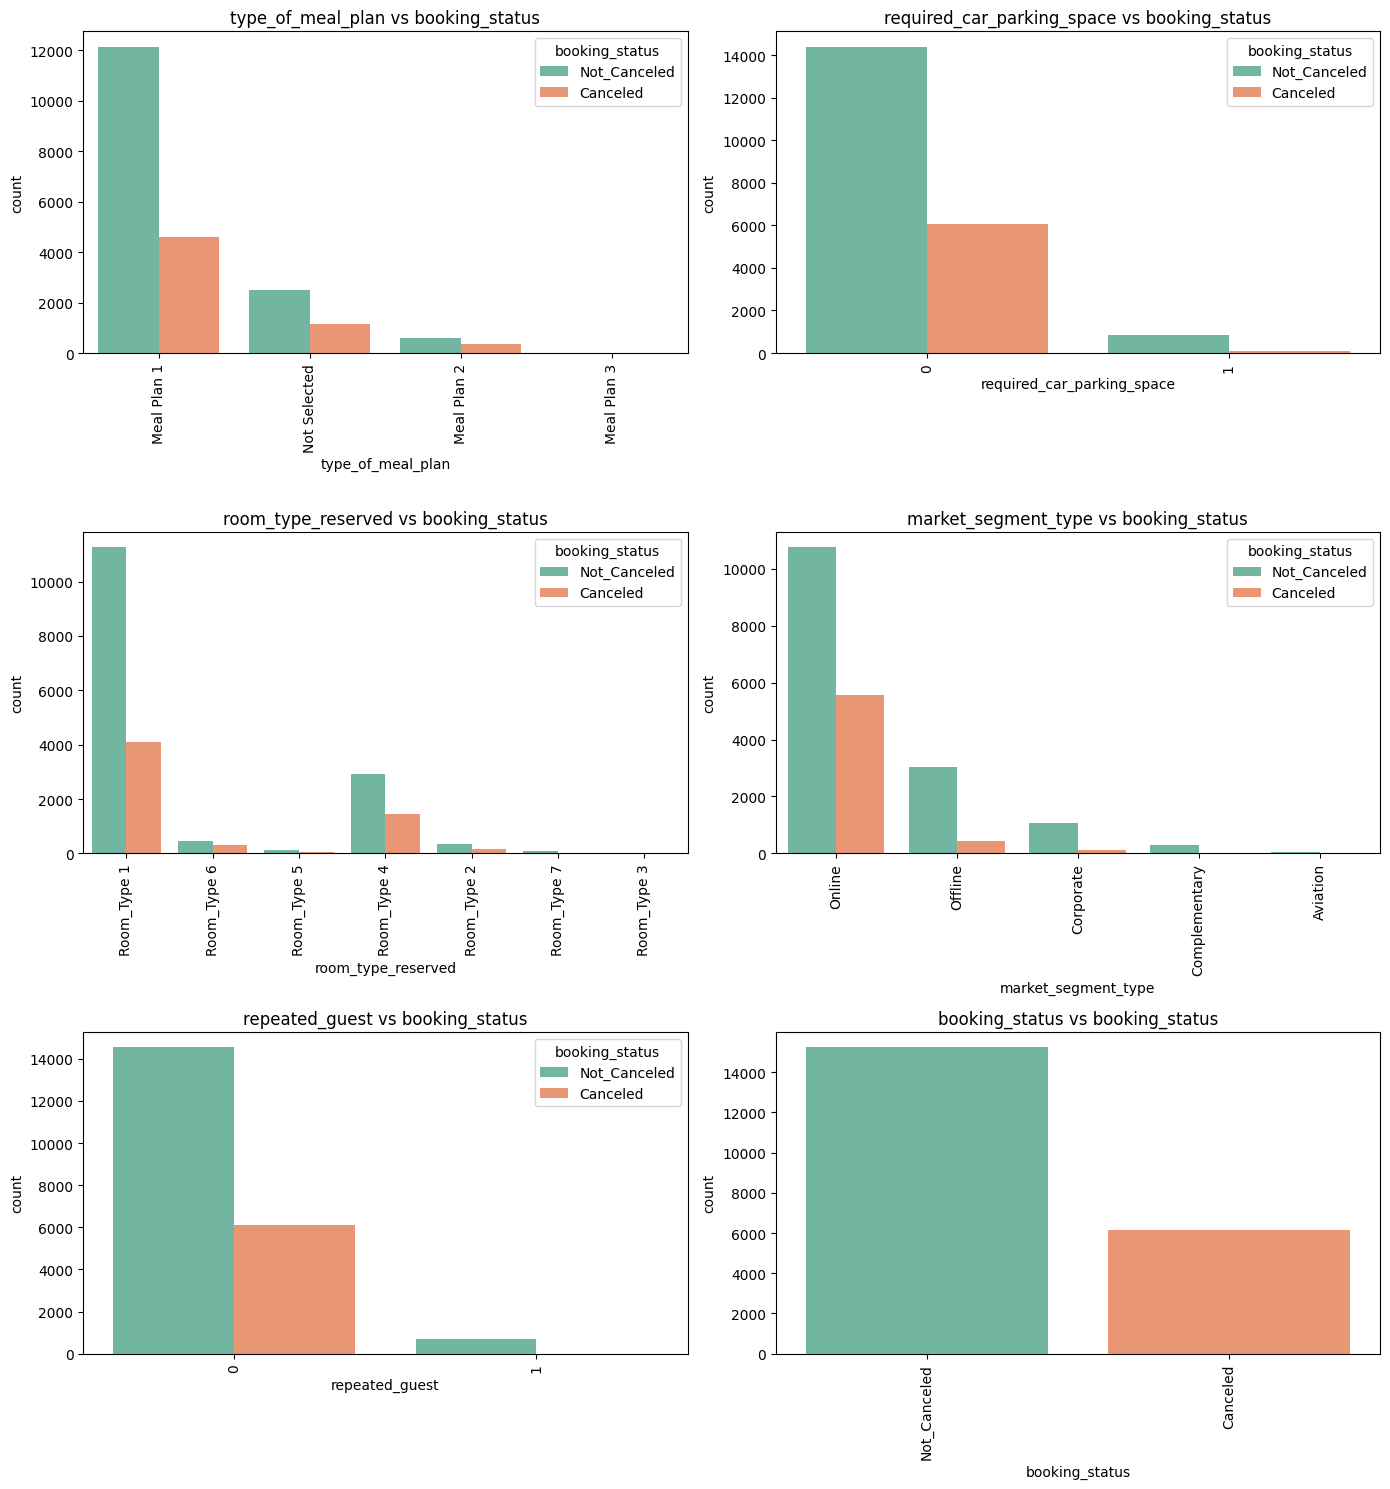

In [39]:
plot_bivariate_cat(data, "booking_status", cat_cols)

## DATA PROCESSING

In [40]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [42]:
df.info() #type_of_meal_plan, room_type_reserved, market_segment_type and booking_status are object type.

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

#### Label encoding

In [43]:
from sklearn.preprocessing import LabelEncoder

In [46]:
label_encoder = LabelEncoder()
mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
    mappings[col]= {label: code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
    
    

In [47]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [48]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

#### Check Multicollearity

In [50]:
!pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/59/9a/e466a1b887a1441141e52dbcc98152f013d85076576da6eed2357f2016ae/statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/87/2b/b50d3d08ea0fc419c183a84210571eba005328efa62b6b98bc28e9ead32a/patsy-1.0.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ----------------------


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [58]:
X= add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"]= X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [59]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


#### Our data dont have multicolliniarity

In [61]:
corr= df.corr()

<Axes: >

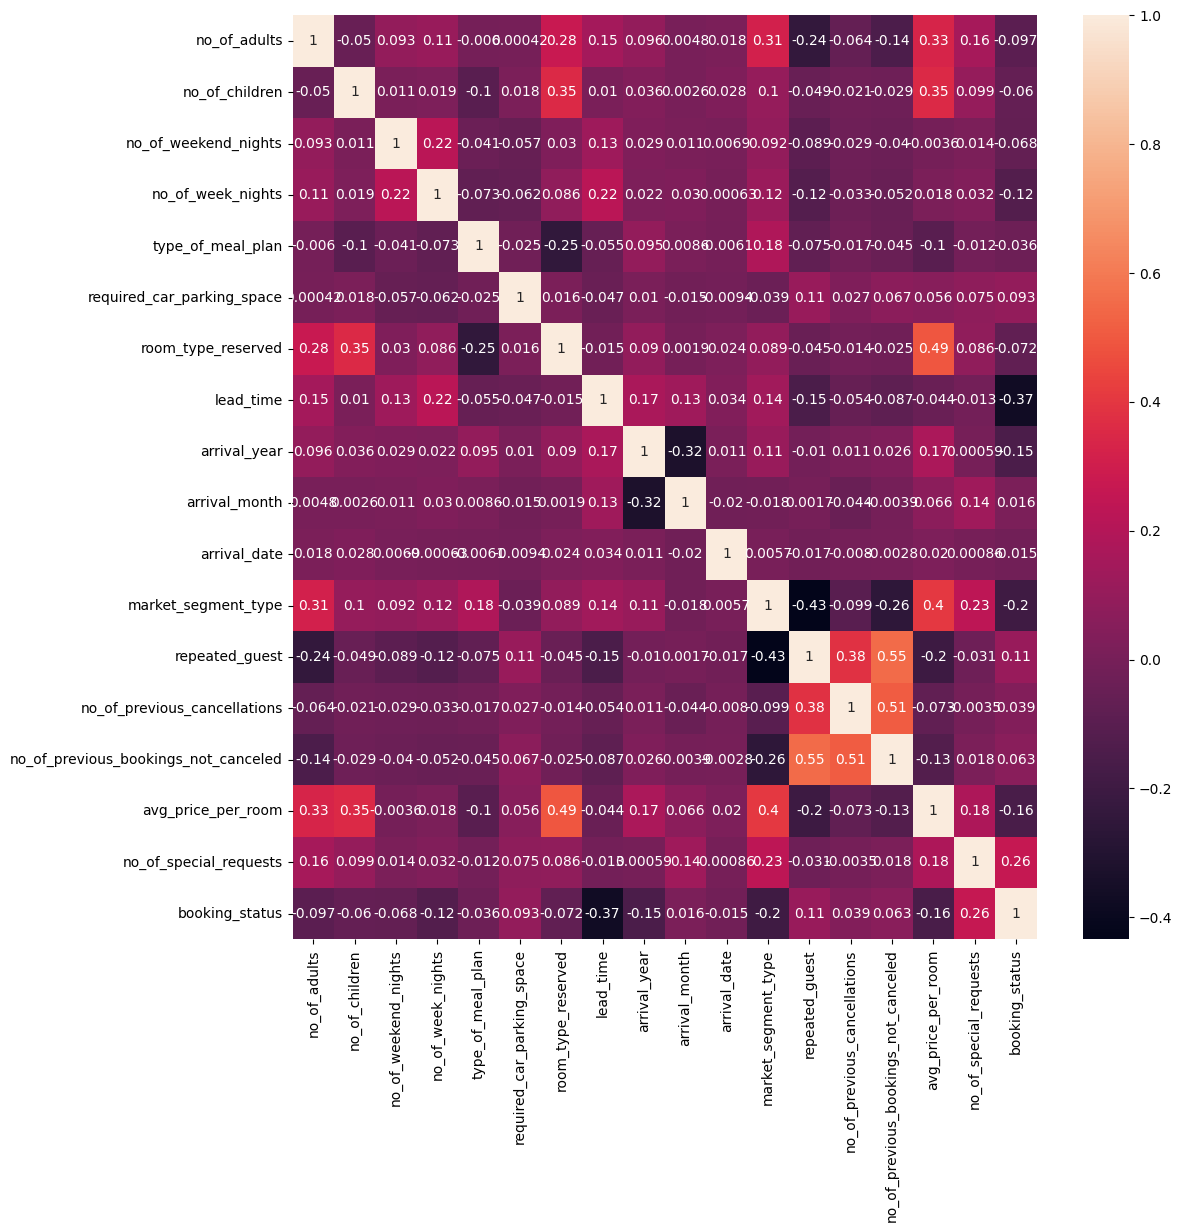

In [67]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True)

#### Skewness

In [68]:
skewness=df.skew()

In [69]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

##### We have to fix highly skewed columns no_of_previous_cancellations & no_of_previous_bookings_not_canceled

In [70]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [71]:
skewness=df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

#### handling Imbalanced dataset now

In [72]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [73]:
X=df.drop(columns="booking_status")
y=df["booking_status"]

In [74]:
X.shape, y.shape

((21359, 17), (21359,))

In [75]:
!pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for sklearn-compat<1,>=0.1 from https://files.pythonhosted.org/packages/f0/a8/ad69cf130fbd017660cdd64abbef3f28135d9e2e15fe3002e03c5be0ca38/sklearn_compat-0.1.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ----- --------------------------------- 30.7/238.4 kB 660.6 kB/s eta 0:00:01
   ------------------ --------------------- 112.6/238.4 kB 1.7 MB/s eta 0:00:01
   ------------------------------------- -- 225.3/238.4 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 1.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [77]:
from imblearn.over_sampling import SMOTE

In [79]:
smote= SMOTE(random_state=42)

X_res, y_res= smote.fit_resample(X,y)

In [80]:
X_res.shape, y_res.shape

((30462, 17), (30462,))

In [89]:
balanced_df= pd.DataFrame(X_res, columns=X.columns)

In [90]:
balanced_df["booking_status"]= y_res

In [91]:
balanced_df.shape

(30462, 18)

In [92]:
df=balanced_df

In [93]:
len(df.columns)

18

### feature selection : random forest 

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
X=df.drop(columns="booking_status")
y=df["booking_status"]

In [97]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [99]:
feature_importance=model.feature_importances_

In [100]:
feature_importance_df= pd.DataFrame(
    {
        "feature" : X.columns,
        "importance" : feature_importance
    }
)

In [108]:
feature_importance_df=feature_importance_df.sort_values(by="importance", ascending=False)

In [112]:
## Top 10 features

top_10_features = feature_importance_df["feature"].head(10).values

In [113]:
top_10_features

array(['lead_time', 'no_of_special_requests', 'avg_price_per_room',
       'arrival_month', 'arrival_date', 'market_segment_type',
       'no_of_week_nights', 'no_of_weekend_nights', 'type_of_meal_plan',
       'room_type_reserved'], dtype=object)

In [115]:
top_10_df= df[top_10_features.tolist() + ["booking_status"]]

In [116]:
top_10_df.shape

(30462, 11)

In [118]:
df=top_10_df.copy()

#### Model selection

In [120]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/43/80/0b5a2dfcf5b4da27b0b68d2833f05d77e1a374d43db951fca200a1f12a52/xgboost-2.1.4-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 653.6 kB/s eta 0:03:12
   ---------------------------------------- 0.1/124.9 MB 845.5 kB/s eta 0:02:28
   ---------------------------------------- 0.2/124.9 MB 1.1 MB/s eta 0:01:59
   ---------------------------------------- 0.2/124.9 MB 1.1 MB/s eta 0:01:58
   ---------------------------------------- 0.3/124.9 MB 1.0 MB/s eta 0:02:02
   ---------------------------------------- 0.4/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 0.5/124.9 MB 1.4 MB/s eta 0:01:27
   ---------------------------------------- 0.6/124.9 MB 1.5 MB/s eta 0:01:21
   ----------------------


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
! pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/5e/23/f8b28ca248bb629b9e08f877dd2965d1994e1674a03d67cd10c5246da248/lightgbm-4.6.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.5 MB 1.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 880.9 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.5 MB 1.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.5 MB 1.3 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.5 MB 1.3 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.5 MB 1.2 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.5 MB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.5 MB 1.4 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.5 MB 1.4 MB/s eta 0:00:01
   --------------- -------------------


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [123]:
X=df.drop(columns="booking_status")
y=df["booking_status"]

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [126]:
classifiers={
    "Random Forest" : RandomForestClassifier(random_state=42),
    "Logistic regression" : LogisticRegression(random_state=42),
    "gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "support vector classifier" : SVC(random_state=42),
    "decision tree classifier" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "naive bais" : GaussianNB(),
    "XGBoost" : XGBClassifier(random_state=42),
    "ADA boost" : AdaBoostClassifier(random_state=42),
    "LGBM Classifier" : LGBMClassifier(random_state=42)  
}

In [142]:
metrics= {
    "Model" :[],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 score" : []
    
}

In [143]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(X_test)
    
    accuracy= accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 score"].append(f1score)
    
    

c:\Users\sneha\OneDrive\Desktop\Mar2025\MLOPS-PROJECT-1\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
metrics_df=pd.DataFrame(metrics)

In [145]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 score
0,Random Forest,0.891679,0.892508,0.892508,0.892508
1,Logistic regression,0.774331,0.802787,0.731922,0.765718
2,gradient Boosting,0.837190,0.821473,0.864821,0.842590
3,support vector classifier,0.720335,0.729657,0.706840,0.718068
4,decision tree classifier,0.840801,0.850000,0.830619,0.840198
5,KNN,0.779419,0.856612,0.675244,0.755191
6,naive bais,0.773346,0.803232,0.728664,0.764133
7,XGBoost,0.870343,0.866324,0.878176,0.872210
8,ADA boost,0.804202,0.821294,0.781433,0.800868
9,LGBM Classifier,0.866732,0.851494,0.890879,0.870742


#### Train Random forest model as its performing best

In [146]:
## Model hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [147]:
X=df.drop(columns="booking_status")
y=df["booking_status"]

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [149]:
rf= RandomForestClassifier(random_state=42)

In [150]:
param_dist = {
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split' : randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True, False],
    
}

In [152]:
random_search = RandomizedSearchCV(
    estimator= rf,
    param_distributions= param_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [153]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  19.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  10.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  10.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   9.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  10.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  14.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  10.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  10.7s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000239E47D3710>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000239DE2267E0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000239E4FE08F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000239E3C1BB30>},
                   random_state=42, scoring='accuracy', verbose=2)

In [154]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [156]:
best_rf_model=random_search.best_estimator_

In [157]:
y_test=best_rf_model.predict(X_test)

In [158]:
accuracy= accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

In [159]:
accuracy

0.9332020351222715

In [160]:
#### Save the model

In [161]:
import joblib

In [163]:
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [164]:
loaded_model=joblib.load("random_forest.pkl")

In [167]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [172]:
new_data= np.array([190	,1	,93.5	,9	,8	,4,5,2,0,0]).reshape(1, -1)

In [173]:
loaded_model.predict(new_data)

c:\Users\sneha\OneDrive\Desktop\Mar2025\MLOPS-PROJECT-1\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])